# *Real o Falso?*



 Tomamos una base de datos de **kaggle** de empleos. Este archivo contiene el conjunto de datos de descripciones de trabajos y su metainformación. Una pequeña proporción de estas descripciones son falsas o estafas que se pueden identificar por la columna "fraudulenta". 
 
 Haremos un análisis basándonos en las siguientes cuestiones:
 
 <br>
 

* Qué empleos son los mas demandados?
* Qué empleos son los mejor pagados?
* Empleos mas demandados es sinonimo de menos paga?
* Dónde se concentra la mayoria de los empleos?
* Entre otros.


<br>
<br>
<br>

<div>
    <div>
        <img src="varios/duda.png"  height="500" width="350" align="right">
    </div>
    <div>
        <p align="left">Tambien se hara una predicción de que vacantes son falsas y cuales no; a travez del estudio de sus variables. 
        </p>
        <p align="left">Como es una base estadounidense se tratara de extrapolar los resultados a una base de empleos mexicana
            extrayendo as mismas variables y estudiando si se pueden obtener mas.
        </p>
    </div>
</div>

   

Las variables de estudio son:


- **job_id.** ID, identificación del trabajo.
- **title.** El título de la entrada de anuncio de trabajo.
- **location.** Ubicación geográfica del anuncio de trabajo.
- **department.** Departamento corporativo (por ejemplo, ventas).
- **salary_range.** Rango de salario indicativo (por ejemplo,  50,000-60,000)
- **company_profile.** Una breve descripción de la empresa.
- **description.** La descripción detallada del anuncio de trabajo.
- **requirements.** Requisitos enlistados para la oferta de trabajo.
- **benefits.**  Beneficios enlistados que ofrece el empleador.
- **telecommuting.** Es cierto para las posiciones de teletrabajo.
- **has_company_logo.** Es cierto si el logotipo de la empresa está presente.
- **has_questions.** Es cierto si hay preguntas de evaluación.
- **employment_type.** Tipo completo, a tiempo parcial, contrato, etc.
- **required_experience.** Ejecutivo, nivel de entrada, pasante, etc.
- **required_education.** Doctorado, Maestría, Bachillerato, etc.
- **industry.** Automoción, informática, asistencia sanitaria, bienes inmuebles, etc.
- **function.** Consultoría, Ingeniería, Investigación, Ventas, etc.
- **fraudulent.** atributo de clasificación.


In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import function_jobs as fj

In [2]:
jobs = pd.read_csv('./bases/jobs.csv')

### Analisis exploratorio. Primer encuentro.

In [3]:
jobs.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [4]:
jobs.describe(include='all')

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
count,17880.000000,17880,17534,6333,2868,14572,17879,15185,10670,17880.000000,17880.000000,17880.000000,14409,10830,9775,12977,11425,17880.000000
unique,NaN,11231,3105,1337,874,1709,14801,11968,6205,NaN,NaN,NaN,5,7,13,131,37,NaN
top,NaN,English Teacher Abroad,"GB, LND, London",Sales,0-0,We help teachers get safe &amp; secure jobs ab...,"Play with kids, get paid for it Love travel? J...",University degree required. TEFL / TESOL / CEL...,See job description,NaN,NaN,NaN,Full-time,Mid-Senior level,Bachelor's Degree,Information Technology and Services,Information Technology,NaN
freq,NaN,311,718,551,142,726,379,410,726,NaN,NaN,NaN,11620,3809,5145,1734,1749,NaN
mean,8940.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.042897,0.795302,0.491723,NaN,NaN,NaN,NaN,NaN,0.048434
std,5161.655742,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.202631,0.403492,0.499945,NaN,NaN,NaN,NaN,NaN,0.214688
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000
25%,4470.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000
50%,8940.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000
75%,13410.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000


In [5]:
jobs.dtypes

job_id                  int64
title                  object
location               object
department             object
salary_range           object
company_profile        object
description            object
requirements           object
benefits               object
telecommuting           int64
has_company_logo        int64
has_questions           int64
employment_type        object
required_experience    object
required_education     object
industry               object
function               object
fraudulent              int64
dtype: object

In [6]:
jobs.isna().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [7]:
#vamos a buscar datos repetidos
jobs.duplicated().sum()


0

In [8]:
jobs.duplicated(jobs.columns[~jobs.columns.isin(['job_id'])]).sum()


281

In [9]:
jobs_unique = jobs.drop_duplicates(jobs.columns[~jobs.columns.isin(['job_id'])],
                        keep='first')

In [10]:
jobs_unique.isna().sum()

job_id                     0
title                      0
location                 341
department             11328
salary_range           14772
company_profile         3282
description                1
requirements            2648
benefits                7106
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3428
required_experience     6962
required_education      8009
industry                4837
function                6363
fraudulent                 0
dtype: int64

In [11]:
jobs_unique['location'] = jobs_unique['location'].fillna('unknown')


/home/dorxoc/.anaconda3/envs/BeduDA/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [12]:
# vamos a tomar puros empleos de EUA por lo cual crearemos unas nuevas variables sobre localizacion
jobs_unique['country'] = jobs_unique['location'].apply(fj.country)


/home/dorxoc/.anaconda3/envs/BeduDA/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [13]:
jobs_unique['country'].value_counts()

US         10351
GB          2297
GR           921
unknown      549
CA           447
           ...  
SV             1
HR             1
JM             1
KH             1
KZ             1
Name: country, Length: 91, dtype: int64

In [14]:
#tomamos solo los registros de EUA
jobs_US = jobs_unique[jobs_unique['country'] == 'US']

In [15]:
#se crearan otras dos variables correspondiente al estado y la ciudad
jobs_US['state'] = jobs_US['location'].apply(fj.state)
jobs_US['city'] = jobs_US['location'].apply(fj.city)

/home/dorxoc/.anaconda3/envs/BeduDA/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/dorxoc/.anaconda3/envs/BeduDA/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [16]:
jobs_US.isna().sum()

job_id                    0
title                     0
location                  0
department             7394
salary_range           8869
company_profile        1999
description               0
requirements           1705
benefits               4535
telecommuting             0
has_company_logo          0
has_questions             0
employment_type        1723
required_experience    4185
required_education     4366
industry               2624
function               3807
fraudulent                0
country                   0
state                     0
city                      0
dtype: int64

In [17]:
#se rellenaran los NaN acorde a cada variable o en su defecto por un unknown
jobs_US[['department', 'company_profile', 'requirements', 'benefits']] = jobs_US[['department', 'company_profile', 'requirements', 'benefits']].fillna('unknown')

/home/dorxoc/.anaconda3/envs/BeduDA/lib/python3.7/site-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [18]:
jobs_US['employment_type'].value_counts()

Full-time    6652
Contract     1231
Part-time     550
Other         102
Temporary      93
Name: employment_type, dtype: int64

In [19]:
jobs_US['employment_type'] = jobs_US['employment_type'].fillna('unknown')

/home/dorxoc/.anaconda3/envs/BeduDA/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [20]:
jobs_US['required_experience'].value_counts()

Mid-Senior level    1960
Entry level         1892
Associate           1377
Not Applicable       447
Director             259
Internship           151
Executive             80
Name: required_experience, dtype: int64

In [21]:
jobs_US['required_experience'] = jobs_US['required_experience'].fillna('unknown')

/home/dorxoc/.anaconda3/envs/BeduDA/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [22]:
jobs_US['required_education'].value_counts()

Bachelor's Degree                    3101
High School or equivalent            1569
Unspecified                           692
Associate Degree                      208
Master's Degree                       176
Certification                          82
Some College Coursework Completed      78
Professional                           25
Some High School Coursework            24
Vocational                             13
Doctorate                              13
Vocational - HS Diploma                 2
Vocational - Degree                     2
Name: required_education, dtype: int64

In [23]:
jobs_US['required_education'] = jobs_US['required_education'].fillna('Unspecified')

/home/dorxoc/.anaconda3/envs/BeduDA/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [24]:
#agrupamos algunos valores que pueda que pertenescan a la misma clase)
jobs_US['required_education'] = jobs_US['required_education'].apply(fj.education)

/home/dorxoc/.anaconda3/envs/BeduDA/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [25]:
jobs_US['required_education'].value_counts()

Unspecified                          5058
Bachelor's Degree                    3101
High School or equivalent            1569
Associate Degree                      208
Master's Degree                       176
Certification                          82
Some College Coursework Completed      78
Professional                           42
Some High School Coursework            24
Doctorate                              13
Name: required_education, dtype: int64

In [26]:
jobs_US['industry'].value_counts()

Information Technology and Services    781
Computer Software                      759
Education Management                   716
Financial Services                     526
Internet                               468
                                      ... 
Sporting Goods                           1
Ranching                                 1
Museums and Institutions                 1
Gambling & Casinos                       1
Maritime                                 1
Name: industry, Length: 124, dtype: int64

In [27]:
jobs_US['industry'] = jobs_US['industry'].fillna('unknown')

/home/dorxoc/.anaconda3/envs/BeduDA/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [28]:
jobs_US['function'].value_counts()

Sales                     933
Customer Service          917
Information Technology    745
Engineering               682
Administrative            389
Marketing                 380
Education                 291
Health Care Provider      254
Other                     228
Management                220
Design                    170
Accounting/Auditing       130
Human Resources           109
Business Development      103
Project Management         99
Finance                    77
Consulting                 75
Quality Assurance          72
Production                 63
Manufacturing              63
Product Management         54
Art/Creative               53
Public Relations           50
Writing/Editing            45
General Business           44
Business Analyst           43
Data Analyst               37
Advertising                35
Legal                      30
Research                   29
Strategy/Planning          26
Supply Chain               24
Financial Analyst          21
Distributi

In [29]:
jobs_US['function'] = jobs_US['function'].fillna('unknown')

/home/dorxoc/.anaconda3/envs/BeduDA/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [30]:
jobs_var = jobs_US[jobs_US.columns[~jobs_US.columns.isin(['job_id', 'location', 'salary_range', 'country'])]].reset_index(drop=True)

In [31]:
jobs_cat = jobs_var[jobs_var.columns[~jobs_var.columns.isin(['title', 'company_profile', 'description', 'requirements', 'benefits'])]]

In [32]:
jobs_text = jobs_var[['title', 'company_profile', 'description', 'requirements', 'benefits']]

In [33]:
jobs_text

,title,company_profile,description,requirements,benefits
0,Marketing Intern,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,unknown
1,Commissioning Machinery Assistant (CMA),Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,unknown
2,Account Executive - Washington DC,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...
3,Bill Review Manager,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered
4,Accounting Clerk,unknown,Job OverviewApex is an environmental consultin...,unknown,unknown
...,...,...,...,...,...
10346,Product Manager,Flite delivers ad innovation at scale to the w...,Flite's SaaS display ad platform fuels the wor...,BA/BS in Computer Science or a related technic...,Competitive baseAttractive stock option planMe...
10347,Recruiting Coordinator,unknown,RESPONSIBILITIES:Will facilitate the recruitin...,REQUIRED SKILLS:Associates Degree or a combina...,unknown
10348,JavaScript Developer,unknown,"Sr, JavaScript Developer Experience : 4-10 yea...",unknown,unknown
10349,Payroll Accountant,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...


In [34]:
jobs_cat

,department,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,state,city
0,Marketing,0,1,0,Other,Internship,Unspecified,unknown,Marketing,0,NY,new york
1,unknown,0,1,0,unknown,unknown,Unspecified,unknown,unknown,0,IA,wever
2,Sales,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,DC,washington
3,unknown,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,FL,fort worth
4,unknown,0,0,0,unknown,unknown,Unspecified,unknown,unknown,0,MD,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...
10346,Product Development,0,1,0,Full-time,unknown,Unspecified,Internet,Product Management,0,CA,san francisco
10347,unknown,0,1,0,Contract,unknown,Unspecified,Utilities,unknown,0,NC,charlotte
10348,unknown,0,0,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Information Technology,0,unknown,unknown
10349,Accounting,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0,PA,philadelphia


In [35]:
from sklearn.tree import DecisionTreeClassifier  
from sklearn.model_selection import train_test_split

In [36]:
jobs_cat.columns

Index(['department', 'telecommuting', 'has_company_logo', 'has_questions',
       'employment_type', 'required_experience', 'required_education',
       'industry', 'function', 'fraudulent', 'state', 'city'],
      dtype='object')

In [37]:
jobs_dummies = pd.get_dummies(jobs_cat[['telecommuting', 'has_company_logo', 'has_questions',
       'employment_type', 'required_experience', 'required_education']])

In [38]:
jobs_dummies


,telecommuting,has_company_logo,has_questions,employment_type_Contract,employment_type_Full-time,employment_type_Other,employment_type_Part-time,employment_type_Temporary,employment_type_unknown,required_experience_Associate,...,required_education_Associate Degree,required_education_Bachelor's Degree,required_education_Certification,required_education_Doctorate,required_education_High School or equivalent,required_education_Master's Degree,required_education_Professional,required_education_Some College Coursework Completed,required_education_Some High School Coursework,required_education_Unspecified
0,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,0,1,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,1,1,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10346,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10347,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10348,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
10349,0,1,1,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [39]:
X_ent, X_val, y_ent, y_val= train_test_split(jobs_dummies, jobs_cat['fraudulent'], test_size=0.3, random_state= 100)


In [40]:
AC= DecisionTreeClassifier(criterion= 'entropy', max_depth= None, min_samples_split= 2, 
                           min_samples_leaf= 1, max_leaf_nodes= None,
                           class_weight= None, max_features= None, random_state= None)

In [41]:
AC.fit(X_ent, y_ent)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [42]:
## Obtenemos el Score del ajuste
print('Score de la base de entrenamiento: {}'.format(AC.score(X_ent, y_ent)))

## Obtenemos el Score de la base de validación
print('Score de la base de validación: {}'.format(AC.score(X_val, y_val)))

Score de la base de entrenamiento: 0.938992408557626
Score de la base de validación: 0.9388280746941404


In [43]:
#import graphviz            # Librería para graficar árbol
from sklearn import tree   # Importamos tree para imprimir el árbol
import os

In [44]:
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud

In [45]:
text_title =jobs_text['title'].apply(fj.text)

In [46]:
text_title

0                                         Marketing Intern
1                    Commissioning Machinery Assistant CMA
2                         Account Executive  Washington DC
3                                      Bill Review Manager
4                                         Accounting Clerk
                               ...                        
10346                                      Product Manager
10347                               Recruiting Coordinator
10348                                 JavaScript Developer
10349                                   Payroll Accountant
10350    Project Cost Control Staff Engineer  Cost Cont...
Name: title, Length: 10351, dtype: object

In [47]:
text_nlp = ' '.join(text_title)

In [50]:
StopWords = set(stopwords.words('english'))


In [56]:
wordcloud = WordCloud(background_color='white',
        stopwords=StopWords,
        max_words=30,
        max_font_size=200, 
        scale=3,
        random_state=3).generate(str(text_nlp))

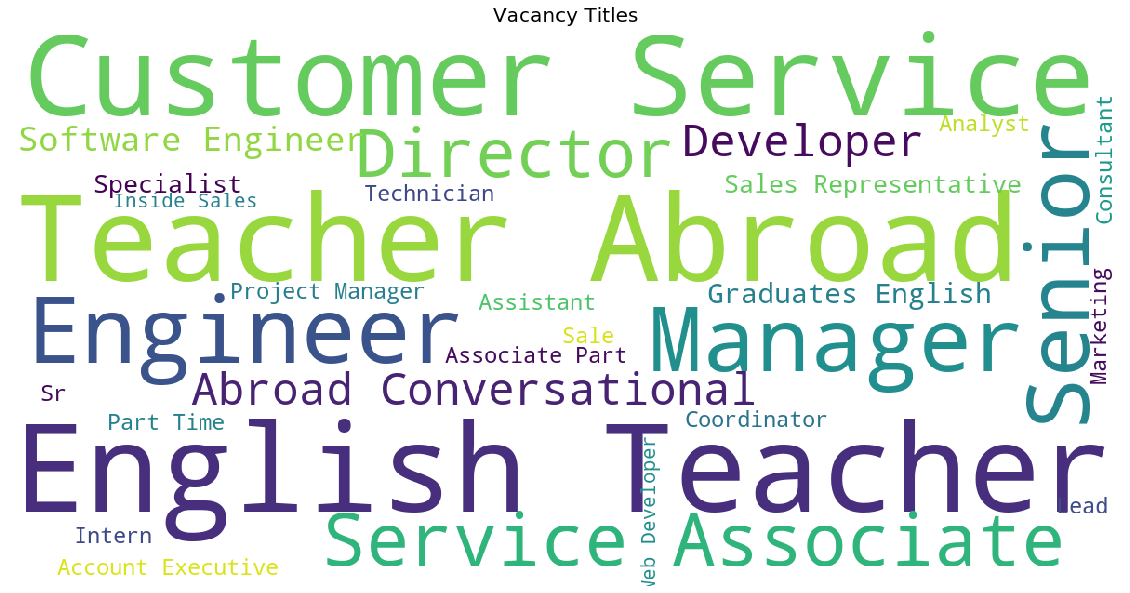

In [57]:
wordcloud.recolor(random_state=1)
plt.figure(figsize=(20, 15))
plt.title('Vacancy Titles', fontsize=20,color='black')
plt.imshow(wordcloud)
plt.axis('off')
plt.show()